In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_image(image):
    
    plt.figure(figsize =(12,12))
    plt.imshow(image)
    plt.title(f"Shape : {image.shape}")
    plt.axis("off")
    plt.show()
    
def convert_rgb(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

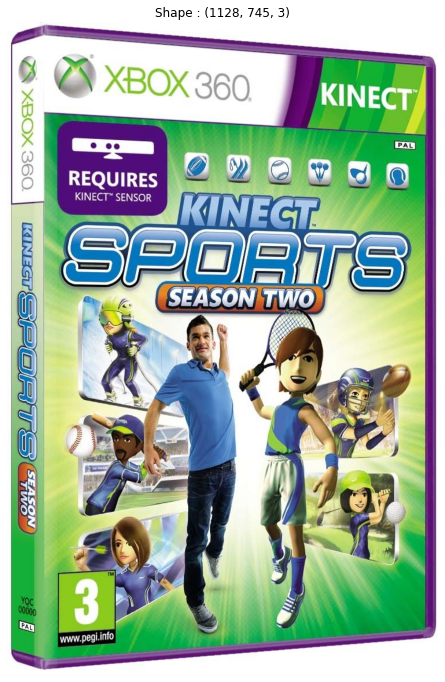

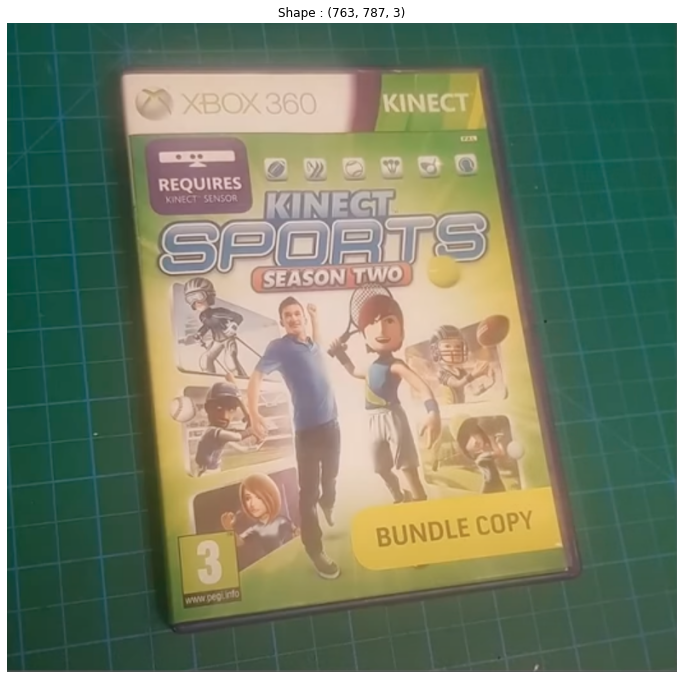

In [3]:
path1 = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/ImagesQuery/kinetic.jpeg"
path2 = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/ImagesTrain/self_kinetic.png"
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

display_image(convert_rgb(img1))
display_image(convert_rgb(img2))

Des1 : (1000, 32), Des2 : (1000, 32)
Kp1 : 1000, Kp2 : 1000
Matches :  1000
Good Matches :  22


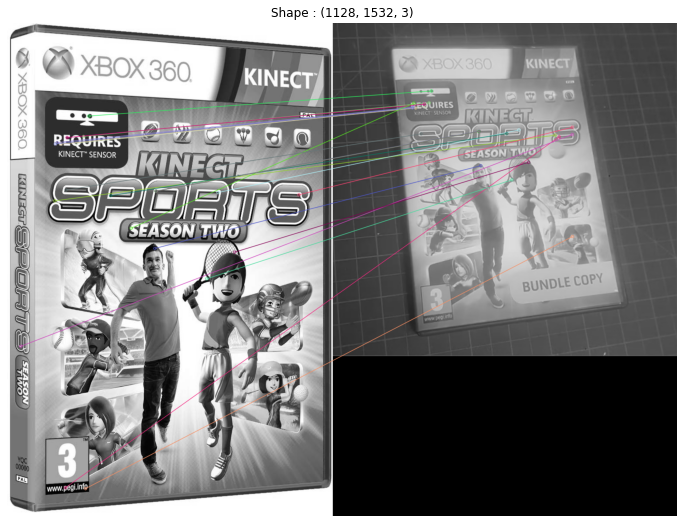

In [4]:
path1 = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/ImagesQuery/kinetic.jpeg"
path2 = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/ImagesTrain/self_kinetic.png"

img1 = cv2.imread(path1,0)
img2 = cv2.imread(path2,0)

orb = cv2.ORB_create(nfeatures = 1000)

kp1,des1 = orb.detectAndCompute(img1,None)
kp2,des2 = orb.detectAndCompute(img2,None)

# 500 features and each of features means 32 vectors
print(f"Des1 : {des1.shape}, Des2 : {des2.shape}")
print(f"Kp1 : {len(kp1)}, Kp2 : {len(kp2)}")

imgKp1 = cv2.drawKeypoints(img1,kp1,None)
imgKp2 = cv2.drawKeypoints(img2,kp2,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k = 2)
print("Matches : ", len(matches))

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

print("Good Matches : ", len(good))

img3 =  cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags = 2)

display_image(convert_rgb(img3))

#display_image(convert_rgb(imgKp1))
#display_image(convert_rgb(imgKp2))

In [11]:
import numpy as np
import os
import cv2

path = "/Users/gokhanersoz/Desktop/Hepsi/OpenCV/PROJECTS/Resources/ImagesQuery"

# Bu method en hızlı olduğu için onu seçtik !!!
orb = cv2.ORB_create()

images = []
classNames = []
myList = os.listdir(path)
print("Total Classes Detected : ", len(myList))

# Kendim Query Klasörü içindekilerini bir alıyorum
# Sonradan ekleyedebiliriz problem değil !!!
# images array ve isimlerini tutuyoruz !!!

for cl in myList:
    imgCur = cv2.imread(f"{path}/{cl}",0)
    images.append(imgCur)
    classNames.append(os.path.splitext(cl)[0].upper())
    
# Bulmuş olduklarımızın Descriptionları tutuyoruz !!!
# Liste içinde  !!!!

def findDes(images):
    desList = []
    for img in images:
        kp,des = orb.detectAndCompute(img,None)
        desList.append(des)
    return desList

desList = findDes(images)
print("Des List : ", len(desList))

# Sonra bu tutmuş olduğumız listeki değerleri
# Kamera ile göstermiş olduğumuz nesne ile karşlaştırıyoruz !!!

# Capture For VideoCapture!!! 
def findId(img,desList,threshold = 15):
    
    kp2,des2 = orb.detectAndCompute(img,None)
    bf = cv2.BFMatcher()
    matchList = []
    finalVal = -1
    
    try:
        for des in desList:
            matches = bf.knnMatch(des,des2,k = 2)
            good = []
            for m,n in matches:
                if m.distance < 0.75*n.distance:
                    good.append([m])

            matchList.append(len(good))
            #print("Good : ", len(good))
        #print("matchList", matchList)
    
    except:
        pass
    
    if len(matchList) != 0:
        if max(matchList) > threshold:
            finalVal = matchList.index(max(matchList))
            
    return finalVal
    
    
cap = cv2.VideoCapture(0)

while True:
    
    conn,frame = cap.read()
    
    imgOriginal = frame.copy()
    
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    idx = findId(frame,desList)
    
    if idx != -1:
        cv2.putText(imgOriginal,classNames[idx],(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
    
    #cv2.imshow("Gray",frame)
    cv2.imshow("Original",imgOriginal)
    
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()

Total Classes Detected :  3
Des List :  3
